## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.
C:\Users\percy\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\percy\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\percy\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\percy\anaconda3\envs\te

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [6]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 1s 26us/step - loss: 1.8474 - accuracy: 0.3393 - val_loss: 1.7552 - val_accuracy: 0.3628
Epoch 2/500
50000/50000 [==============================] - 1s 22us/step - loss: 1.6400 - accuracy: 0.4153 - val_loss: 1.5722 - val_accuracy: 0.4363
Epoch 3/500
50000/50000 [==============================] - 1s 25us/step - loss: 1.5522 - accuracy: 0.4503 - val_loss: 1.6062 - val_accuracy: 0.4289
Epoch 4/500
50000/50000 [==============================] - 1s 24us/step - loss: 1.4915 - accuracy: 0.4687 - val_loss: 1.4791 - val_accuracy: 0.4791
Epoch 5/500
50000/50000 [==============================] - 1s 24us/step - loss: 1.4399 - accuracy: 0.4888 - val_loss: 1.4704 - val_accuracy: 0.4754
Epoch 6/500
50000/50000 [==============================] - 1s 24us/step - loss: 1.3995 - accuracy: 0.5042 - val_loss: 1.5045 - val_accuracy: 0.4622
Epoch 7/500
50000/50000 [==============================] - 1s

50000/50000 [==============================] - 1s 23us/step - loss: 0.3603 - accuracy: 0.8721 - val_loss: 2.2907 - val_accuracy: 0.5156
Epoch 55/500
50000/50000 [==============================] - 1s 24us/step - loss: 0.3373 - accuracy: 0.8836 - val_loss: 2.2258 - val_accuracy: 0.5224
Epoch 56/500
50000/50000 [==============================] - 1s 24us/step - loss: 0.3321 - accuracy: 0.8825 - val_loss: 2.2469 - val_accuracy: 0.5192
Epoch 57/500
50000/50000 [==============================] - 1s 23us/step - loss: 0.3183 - accuracy: 0.8870 - val_loss: 2.3571 - val_accuracy: 0.5017
Epoch 58/500
50000/50000 [==============================] - 1s 24us/step - loss: 0.3182 - accuracy: 0.8880 - val_loss: 2.2751 - val_accuracy: 0.5344
Epoch 59/500
50000/50000 [==============================] - 1s 23us/step - loss: 0.3047 - accuracy: 0.8915 - val_loss: 2.3539 - val_accuracy: 0.5220
Epoch 60/500
50000/50000 [==============================] - 1s 24us/step - loss: 0.2907 - accuracy: 0.8970 - val_loss: 

Epoch 109/500
50000/50000 [==============================] - 1s 23us/step - loss: 0.1122 - accuracy: 0.9603 - val_loss: 3.8130 - val_accuracy: 0.5226
Epoch 110/500
50000/50000 [==============================] - 1s 24us/step - loss: 0.1073 - accuracy: 0.9629 - val_loss: 3.8018 - val_accuracy: 0.5316
Epoch 111/500
50000/50000 [==============================] - 1s 24us/step - loss: 0.0966 - accuracy: 0.9663 - val_loss: 3.9060 - val_accuracy: 0.5274
Epoch 112/500
50000/50000 [==============================] - 1s 24us/step - loss: 0.1066 - accuracy: 0.9619 - val_loss: 3.9899 - val_accuracy: 0.5355
Epoch 113/500
50000/50000 [==============================] - 1s 23us/step - loss: 0.1048 - accuracy: 0.9636 - val_loss: 3.7491 - val_accuracy: 0.5279
Epoch 114/500
50000/50000 [==============================] - 1s 23us/step - loss: 0.0854 - accuracy: 0.9706 - val_loss: 3.8510 - val_accuracy: 0.5306
Epoch 115/500
50000/50000 [==============================] - 1s 23us/step - loss: 0.0764 - accuracy:

50000/50000 [==============================] - 1s 24us/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 4.8374 - val_accuracy: 0.5519
Epoch 164/500
50000/50000 [==============================] - 1s 23us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 4.8153 - val_accuracy: 0.5541
Epoch 165/500
50000/50000 [==============================] - 1s 24us/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 4.8827 - val_accuracy: 0.5540
Epoch 166/500
50000/50000 [==============================] - 1s 23us/step - loss: 0.0010 - accuracy: 0.9999 - val_loss: 4.9005 - val_accuracy: 0.5552
Epoch 167/500
50000/50000 [==============================] - 1s 23us/step - loss: 0.0010 - accuracy: 0.9999 - val_loss: 4.8553 - val_accuracy: 0.5535
Epoch 168/500
50000/50000 [==============================] - 1s 23us/step - loss: 8.1326e-04 - accuracy: 0.9999 - val_loss: 4.8987 - val_accuracy: 0.5565
Epoch 169/500
50000/50000 [==============================] - 1s 24us/step - loss: 8.0489e-04 - accuracy: 0.999

50000/50000 [==============================] - 1s 23us/step - loss: 1.9844e-04 - accuracy: 1.0000 - val_loss: 5.1780 - val_accuracy: 0.5555
Epoch 217/500
50000/50000 [==============================] - 1s 23us/step - loss: 1.9880e-04 - accuracy: 1.0000 - val_loss: 5.1701 - val_accuracy: 0.5542
Epoch 218/500
50000/50000 [==============================] - 1s 24us/step - loss: 1.9479e-04 - accuracy: 1.0000 - val_loss: 5.1800 - val_accuracy: 0.5555
Epoch 219/500
50000/50000 [==============================] - 1s 24us/step - loss: 1.9052e-04 - accuracy: 1.0000 - val_loss: 5.1781 - val_accuracy: 0.5545
Epoch 220/500
50000/50000 [==============================] - 1s 24us/step - loss: 1.9091e-04 - accuracy: 1.0000 - val_loss: 5.1810 - val_accuracy: 0.5563
Epoch 221/500
50000/50000 [==============================] - 1s 24us/step - loss: 1.8940e-04 - accuracy: 1.0000 - val_loss: 5.1818 - val_accuracy: 0.5558
Epoch 222/500
50000/50000 [==============================] - 1s 24us/step - loss: 1.8758e-

50000/50000 [==============================] - 1s 23us/step - loss: 1.3446e-04 - accuracy: 1.0000 - val_loss: 5.2951 - val_accuracy: 0.5545
Epoch 270/500
50000/50000 [==============================] - 1s 24us/step - loss: 1.3345e-04 - accuracy: 1.0000 - val_loss: 5.2995 - val_accuracy: 0.5546
Epoch 271/500
50000/50000 [==============================] - 1s 23us/step - loss: 1.3171e-04 - accuracy: 1.0000 - val_loss: 5.2981 - val_accuracy: 0.5546
Epoch 272/500
50000/50000 [==============================] - 1s 23us/step - loss: 1.3132e-04 - accuracy: 1.0000 - val_loss: 5.3009 - val_accuracy: 0.5543
Epoch 273/500
50000/50000 [==============================] - 1s 23us/step - loss: 1.3077e-04 - accuracy: 1.0000 - val_loss: 5.3027 - val_accuracy: 0.5542
Epoch 274/500
50000/50000 [==============================] - 1s 23us/step - loss: 1.3007e-04 - accuracy: 1.0000 - val_loss: 5.3042 - val_accuracy: 0.5543
Epoch 275/500
50000/50000 [==============================] - 1s 24us/step - loss: 1.2930e-

50000/50000 [==============================] - 1s 23us/step - loss: 1.0285e-04 - accuracy: 1.0000 - val_loss: 5.3821 - val_accuracy: 0.5535
Epoch 323/500
50000/50000 [==============================] - 1s 24us/step - loss: 1.0332e-04 - accuracy: 1.0000 - val_loss: 5.3824 - val_accuracy: 0.5526
Epoch 324/500
50000/50000 [==============================] - 1s 23us/step - loss: 1.0201e-04 - accuracy: 1.0000 - val_loss: 5.3837 - val_accuracy: 0.5529
Epoch 325/500
50000/50000 [==============================] - 1s 23us/step - loss: 1.0163e-04 - accuracy: 1.0000 - val_loss: 5.3875 - val_accuracy: 0.5533
Epoch 326/500
50000/50000 [==============================] - 1s 23us/step - loss: 1.0080e-04 - accuracy: 1.0000 - val_loss: 5.3895 - val_accuracy: 0.5542
Epoch 327/500
50000/50000 [==============================] - 1s 23us/step - loss: 1.0064e-04 - accuracy: 1.0000 - val_loss: 5.3885 - val_accuracy: 0.5536
Epoch 328/500
50000/50000 [==============================] - 1s 24us/step - loss: 1.0051e-

50000/50000 [==============================] - 1s 25us/step - loss: 8.4647e-05 - accuracy: 1.0000 - val_loss: 5.4468 - val_accuracy: 0.5535
Epoch 376/500
50000/50000 [==============================] - 1s 24us/step - loss: 8.3841e-05 - accuracy: 1.0000 - val_loss: 5.4499 - val_accuracy: 0.5537
Epoch 377/500
50000/50000 [==============================] - 1s 24us/step - loss: 8.3934e-05 - accuracy: 1.0000 - val_loss: 5.4520 - val_accuracy: 0.5540
Epoch 378/500
50000/50000 [==============================] - 1s 24us/step - loss: 8.3467e-05 - accuracy: 1.0000 - val_loss: 5.4512 - val_accuracy: 0.5537
Epoch 379/500
50000/50000 [==============================] - 1s 24us/step - loss: 8.3281e-05 - accuracy: 1.0000 - val_loss: 5.4514 - val_accuracy: 0.5535
Epoch 380/500
50000/50000 [==============================] - 1s 23us/step - loss: 8.2842e-05 - accuracy: 1.0000 - val_loss: 5.4543 - val_accuracy: 0.5539
Epoch 381/500
50000/50000 [==============================] - 1s 23us/step - loss: 8.2967e-

50000/50000 [==============================] - 1s 24us/step - loss: 7.1672e-05 - accuracy: 1.0000 - val_loss: 5.5051 - val_accuracy: 0.5541
Epoch 429/500
50000/50000 [==============================] - 1s 23us/step - loss: 7.1567e-05 - accuracy: 1.0000 - val_loss: 5.5042 - val_accuracy: 0.5537
Epoch 430/500
50000/50000 [==============================] - 1s 24us/step - loss: 7.1540e-05 - accuracy: 1.0000 - val_loss: 5.5053 - val_accuracy: 0.5540
Epoch 431/500
50000/50000 [==============================] - 1s 23us/step - loss: 7.1186e-05 - accuracy: 1.0000 - val_loss: 5.5051 - val_accuracy: 0.5537
Epoch 432/500
50000/50000 [==============================] - 1s 23us/step - loss: 7.1406e-05 - accuracy: 1.0000 - val_loss: 5.5059 - val_accuracy: 0.5537
Epoch 433/500
50000/50000 [==============================] - 1s 24us/step - loss: 7.0884e-05 - accuracy: 1.0000 - val_loss: 5.5076 - val_accuracy: 0.5540
Epoch 434/500
50000/50000 [==============================] - 1s 23us/step - loss: 7.0721e-

50000/50000 [==============================] - 1s 24us/step - loss: 6.2657e-05 - accuracy: 1.0000 - val_loss: 5.5498 - val_accuracy: 0.5539
Epoch 482/500
50000/50000 [==============================] - 1s 24us/step - loss: 6.2586e-05 - accuracy: 1.0000 - val_loss: 5.5512 - val_accuracy: 0.5544
Epoch 483/500
50000/50000 [==============================] - 1s 24us/step - loss: 6.2522e-05 - accuracy: 1.0000 - val_loss: 5.5525 - val_accuracy: 0.5545
Epoch 484/500
50000/50000 [==============================] - 1s 24us/step - loss: 6.2350e-05 - accuracy: 1.0000 - val_loss: 5.5547 - val_accuracy: 0.5538
Epoch 485/500
50000/50000 [==============================] - 1s 23us/step - loss: 6.2141e-05 - accuracy: 1.0000 - val_loss: 5.5539 - val_accuracy: 0.5545
Epoch 486/500
50000/50000 [==============================] - 1s 23us/step - loss: 6.2029e-05 - accuracy: 1.0000 - val_loss: 5.5549 - val_accuracy: 0.5550
Epoch 487/500
50000/50000 [==============================] - 1s 23us/step - loss: 6.1790e-

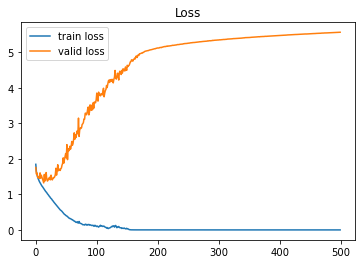

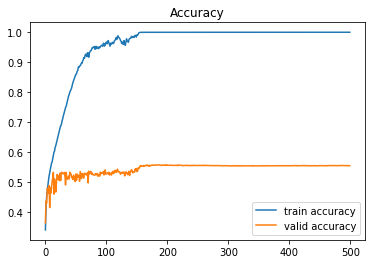

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()